<a href="https://colab.research.google.com/github/maxwang12/readability-analysis-through-linknestedness/blob/main/2024_Count_Clean_Links.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
chunk1 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/Chunk1PrivacyPolicies_df_all_links_list_raw.csv')
chunk2 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk2PrivacyPolicies_df_all_links_list_raw.csv')
chunk3 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk3PrivacyPolicies_df_all_links_list_raw.csv')
chunk4 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk4PrivacyPolicies_df_all_links_list_raw.csv')
chunk5 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk5PrivacyPolicies_df_all_links_list_raw.csv')
chunk6 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk6PrivacyPolicies_df_all_links_list_raw.csv')
chunk7 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk7PrivacyPolicies_df_all_links_list_raw.csv')
chunk8 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk8PrivacyPolicies_df_all_links_list_raw.csv')
chunk9 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk9PrivacyPolicies_df_all_links_list_raw.csv')



In [4]:
# Concatenate the chunks to combine the chunks into one dataframe
all_chunks = pd.concat([chunk1, chunk2, chunk3, chunk4, chunk5,
                        chunk6, chunk7, chunk8, chunk9])


In [5]:
#  print the number of empty lists in all_links to see how many pages had no links in them

count = 0
for i in all_chunks['all_links']:
  if i == '[]':
    count += 1
print(count)


1034


In [6]:
# count the number on nans in all_links column
all_chunks['all_links'].isna().sum()


23391

In [18]:
#drop rows that have an empty all_links column

all_chunks_nonan = all_chunks.dropna(subset=['all_links'])
all_chunks_nonan.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48609 entries, 1 to 7999
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id_x                              48609 non-null  int64  
 1   site_id                           48609 non-null  int64  
 2   homepage_snapshot_url             48609 non-null  object 
 3   policy_snapshot_url               48609 non-null  object 
 4   policy_url                        48609 non-null  object 
 5   homepage_snapshot_redirected_url  48609 non-null  object 
 6   year                              48609 non-null  int64  
 7   phase                             48609 non-null  object 
 8   policy_text_id                    48609 non-null  int64  
 9   policy_html_id                    48609 non-null  int64  
 10  policy_reader_view_html_id        48609 non-null  int64  
 11  file_type                         48609 non-null  object 
 12  policy_tit

In [21]:
def clean_links(links_list):
  cleaned_list = []
  if links_list is not None: # Check if links_list is None
    for link in links_list:
      if link is not None and '#' not in link and 'mailto' not in link and link != '/': # Check if link is None and not '/'
        cleaned_list.append(link)
  return cleaned_list

# Apply the cleaning function to the 'all_links' column (no eval() needed)
all_chunks_nonan['all_links'] = all_chunks_nonan['all_links'].apply(clean_links)
all_chunks_nonan['all_links']

<ipython-input-21-1fe99cce3668>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_chunks_nonan['all_links'] = all_chunks_nonan['all_links'].apply(clean_links)


1       [index.php?rid=, /members/?rid=, faqs.php?rid=...
3       [javascript:;, /games/, /forum/, /support/, ht...
4       [/about.html, /news.html, /careers.html, http:...
5       [/times_fares/postcode.html, http://www.facebo...
6       [http://ebuzzdaily.net/, http://ebuzzdaily.net...
                              ...                        
7992    [/about, /terms, /legal, http://thisismyjam.co...
7993    [http://www.zivame.com/zivame-brands.html?dir=...
7994    [http://streamtuner.ag/, /contact, https://www...
7995    [http://www.fandom.com, http://www.fandom.com/...
7999    [javascript:void(0);, /entertainment, /acg, /s...
Name: all_links, Length: 48609, dtype: object

In [24]:
all_chunks_nonan['all_links']

1       [index.php?rid=, /members/?rid=, faqs.php?rid=...
3       [javascript:;, /games/, /forum/, /support/, ht...
4       [/about.html, /news.html, /careers.html, http:...
5       [/times_fares/postcode.html, http://www.facebo...
6       [http://ebuzzdaily.net/, http://ebuzzdaily.net...
                              ...                        
7992    [/about, /terms, /legal, http://thisismyjam.co...
7993    [http://www.zivame.com/zivame-brands.html?dir=...
7994    [http://streamtuner.ag/, /contact, https://www...
7995    [http://www.fandom.com, http://www.fandom.com/...
7999    [javascript:void(0);, /entertainment, /acg, /s...
Name: all_links, Length: 48609, dtype: object

In [25]:
#create a columns called all_chunks_nonan['num_links'] that return the number of list items in each row of filtered_df_09_14_19['all_links']

all_chunks_nonan['num_links'] = all_chunks_nonan['all_links'].apply(lambda x: len(x) if isinstance(x, list) else 0)
all_chunks_nonan[['num_links', 'all_links']]


<ipython-input-25-e0ed68965f81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_chunks_nonan['num_links'] = all_chunks_nonan['all_links'].apply(lambda x: len(x) if isinstance(x, list) else 0)


,num_links,all_links
1,9,"[index.php?rid=, /members/?rid=, faqs.php?rid=..."
3,40,"[javascript:;, /games/, /forum/, /support/, ht..."
4,103,"[/about.html, /news.html, /careers.html, http:..."
5,68,"[/times_fares/postcode.html, http://www.facebo..."
6,12,"[http://ebuzzdaily.net/, http://ebuzzdaily.net..."
...,...,...
7992,18,"[/about, /terms, /legal, http://thisismyjam.co..."
7993,193,[http://www.zivame.com/zivame-brands.html?dir=...
7994,135,"[http://streamtuner.ag/, /contact, https://www..."
7995,112,"[http://www.fandom.com, http://www.fandom.com/..."


In [26]:
all_chunks_nonan.to_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/PrivacyPolicies_df_all_nona_linkcount.csv')

#plot

In [29]:
#create a dataframe that gives the average sampled_df['num_links'] by sampled_df['year'] and keep year as a column

link_count_by_year = all_chunks_nonan.groupby('year')['num_links'].mean()
link_count_by_year_df = pd.DataFrame(link_count_by_year)
link_count_by_year_df


,num_links
year,
2009,48.339990
2010,59.209077
2011,61.078575
2012,63.904509
2013,64.682602
2014,71.989015
2015,71.541152
2016,75.398148
2017,75.303249


In [30]:
# make year a column and reindex the dataframe link_count_by_year_df

link_count_by_year_df = link_count_by_year_df.reset_index()
link_count_by_year_df


,year,num_links
0,2009,48.339990
1,2010,59.209077
2,2011,61.078575
3,2012,63.904509
4,2013,64.682602
5,2014,71.989015
6,2015,71.541152
7,2016,75.398148
8,2017,75.303249
9,2018,78.265546


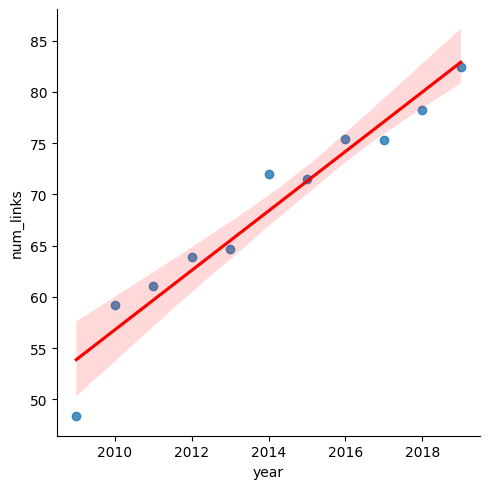

In [36]:
#plot link_count_by_year_df by like_count and year and add a trend line, y axis from 0-1000

sns.lmplot(x="year", y="num_links", data=link_count_by_year_df, line_kws={'color': 'red'})
# plt.ylim(0, 400)
plt.show()


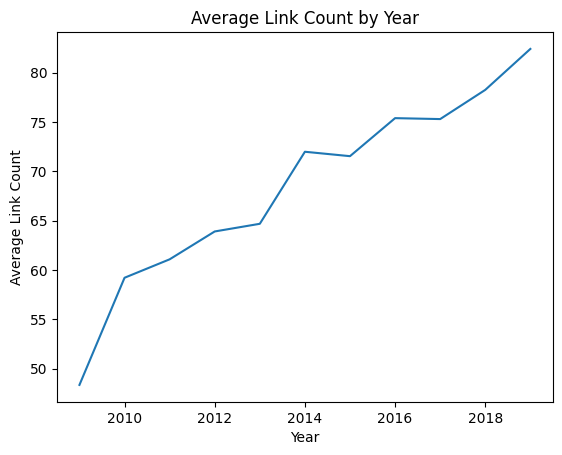

In [34]:
#plot link_count_by_year_df by like_count and year


plt.plot(link_count_by_year_df['year'], link_count_by_year_df['num_links'])
plt.xlabel('Year')
plt.ylabel('Average Link Count')
plt.title('Average Link Count by Year')
plt.show()
